In [1]:
import os
import time
import random

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
'''
def txt_to_csv(src_path, dest_path):
    with open(src_path, 'r') as f:
        s = f.read()
        l = [ eval(i) for i in s.split(' ')[:-1]]

        pd.DataFrame({
            'exe_time': l
        }).to_csv(dest_path, index=False)
        
list_path = [ file for file in os.listdir('./') if file[-3:] == 'txt']
for file in list_path:
    print('Processing {}'.format(file))
    txt_to_csv(file, file[:-3] + 'csv')
'''

"\ndef txt_to_csv(src_path, dest_path):\n    with open(src_path, 'r') as f:\n        s = f.read()\n        l = [ eval(i) for i in s.split(' ')[:-1]]\n\n        pd.DataFrame({\n            'exe_time': l\n        }).to_csv(dest_path, index=False)\n        \nlist_path = [ file for file in os.listdir('./') if file[-3:] == 'txt']\nfor file in list_path:\n    print('Processing {}'.format(file))\n    txt_to_csv(file, file[:-3] + 'csv')\n"

In [3]:
# loading data
data_dir = './data/'
col_name = 'exe_time'
list_df = [ pd.read_csv(data_dir + file) for file in os.listdir(data_dir) if file[-3:] == 'csv']
list_df.append(pd.concat(list_df))

In [4]:
# top_bound = q3 + whisker * (q3-q1)
# lower_bound = q1 - whisker * (q3-q1)
whisker = 1.5
# 
# statistics
stat_df = pd.DataFrame({
    'mean': [ df[col_name].mean() for df in list_df],
    'std':  [ df[col_name].std() for df in list_df],
    'min':  [ df[col_name].min() for df in list_df],
    'q1':   [ df[col_name].quantile(0.25) for df in list_df],
    'q2':   [ df[col_name].quantile(0.5) for df in list_df],
    'q3':   [ df[col_name].quantile(0.75) for df in list_df],
    'max':  [ df[col_name].max() for df in list_df],
    'size': [ df.shape[0] for df in list_df],
    'outlier_percentage': [ 
        df[df[col_name] > (df[col_name].quantile(0.75) + (df[col_name].quantile(0.75) - df[col_name].quantile(0.25)) * whisker)].shape[0]/df.shape[0] 
        for df in list_df]
})
stat_df

,mean,std,min,q1,q2,q3,max,size,outlier_percentage
0,813.453871,1482.630300,421,566.0,588.0,817.0,984858,5013217,0.172865
1,796.451435,1383.122395,415,555.0,577.0,804.0,326170,5013217,0.181781
2,821.793484,1445.303048,526,559.0,582.0,844.0,971966,5013217,0.090006
3,800.432307,1381.025740,416,557.0,580.0,794.0,280888,5013217,0.172169
4,825.908958,1455.908904,424,567.0,590.0,842.0,1042348,5013217,0.114441
5,811.608011,1430.222958,415,561.0,583.0,817.0,1042348,25066085,0.162403


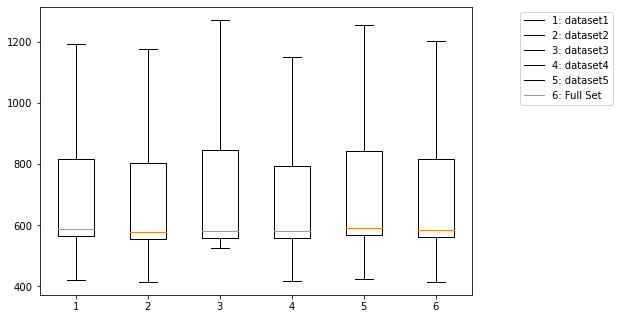

In [5]:
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot([df[col_name] for df in list_df], showfliers=False)
ax.legend([ '{}: dataset{}'.format(i, i) for i in range(1,6)] + ['6: Full Set'], bbox_to_anchor=(1.1, 1))
plt.show()

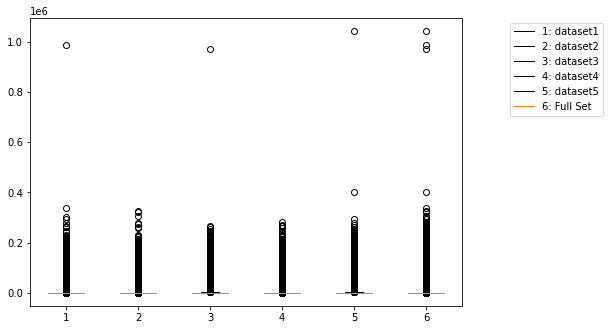

In [6]:
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot([df[col_name] for df in list_df])
ax.legend([ '{}: dataset{}'.format(i, i) for i in range(1,6)] + ['6: Full Set'], bbox_to_anchor=(1.1, 1))
plt.show()

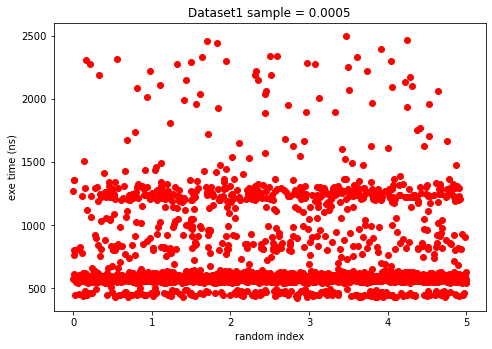

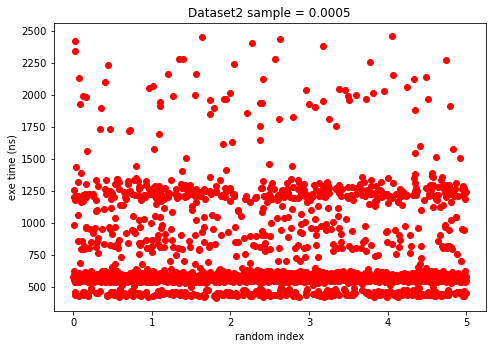

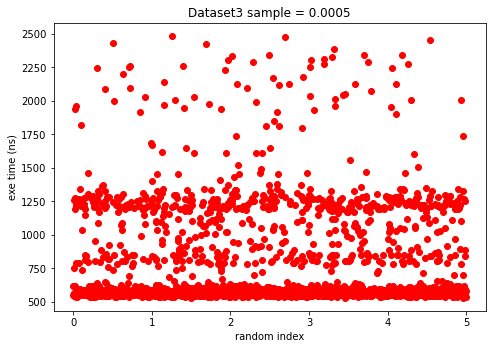

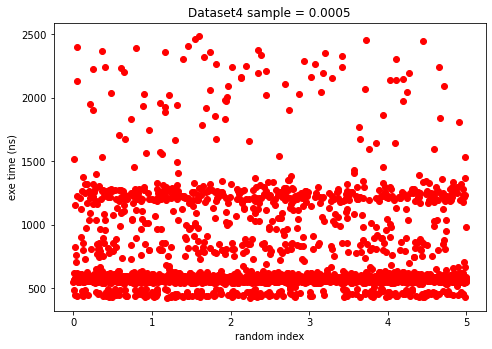

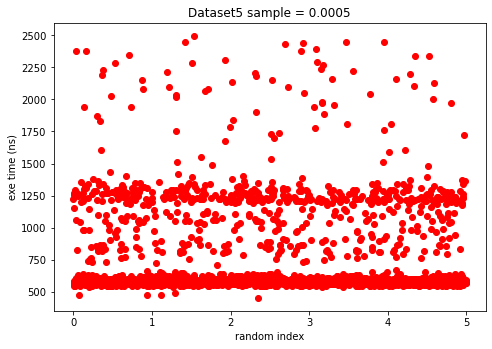

In [7]:
# visualization
ratio = 0.0005
thresh_hold = 2500
number_sampling = 5
experiment_index = 0

sampling_list = []

for experiment_index in range(len(list_df)-1):
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    sub_df = list_df[experiment_index].sample(frac=ratio)
    sampling_list.append(sub_df)
#         thresh_hold = 5 * sub_df['exe_time'].mean()
    Y = np.array([ i for i in sub_df['exe_time'] if i < thresh_hold])


    ax.scatter([ random.random() * 5 for i in range(len(Y))], Y, color='r')
    ax.set_xlabel('random index')
    ax.set_ylabel('exe time (ns)')
    ax.set_title('Dataset{} sample = {}'.format(experiment_index+1, ratio))
#     ax.set_xlim(-1, 6)
    plt.show()

#     print(Y.mean(), Y.std(), Y.max(), Y. min())

In [8]:
# K Mean
K = 4
list_kmeans = []
for experiment_index in range(len(list_df)-1):
    sub_df = sampling_list[experiment_index]
    Y = np.array([ [i,0] for i in sub_df['exe_time'] if i < thresh_hold])
    kmeans = KMeans(n_clusters=K, random_state=0).fit(Y)
    list_kmeans.append(kmeans)
    print('Processing dataset {}'.format(experiment_index + 1))

# kmeans.predict([[0, 0], [12, 3]])
# kmeans.cluster_centers_
# kmeans.labels_

Processing dataset 1
Processing dataset 2
Processing dataset 3
Processing dataset 4
Processing dataset 5


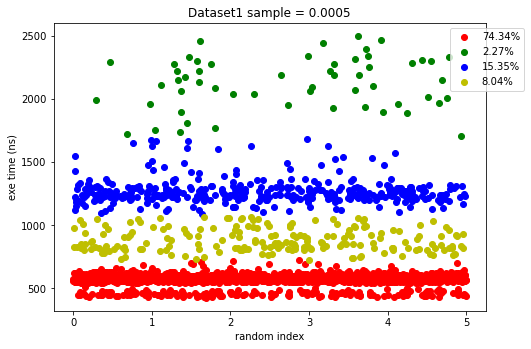

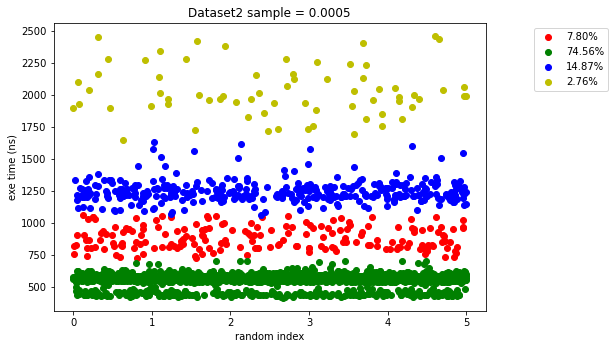

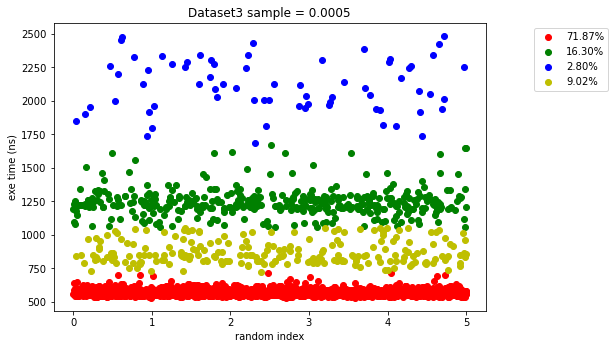

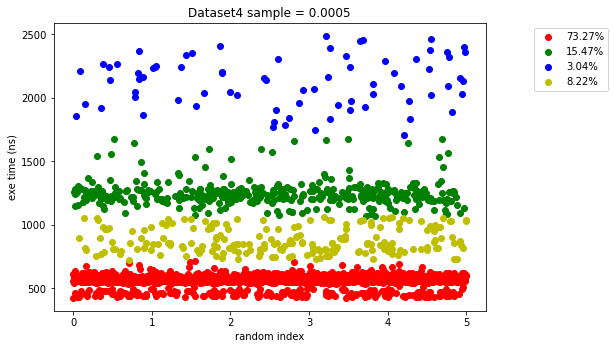

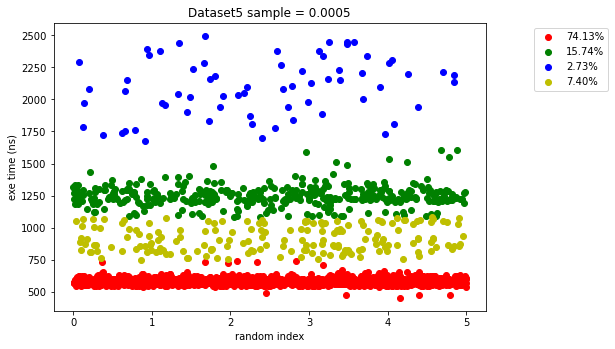

In [9]:
for experiment_index in range(len(list_df)-1):
    kmeans = list_kmeans[experiment_index]
    Y = np.array([ i for i in sampling_list[experiment_index]['exe_time'] if i < thresh_hold])
    l_x = [[] for i in range(K)]
    l_y = [[] for i in range(K)]
    l_color = ['r', 'g', 'b', 'y', 'm']
    for index, clsuter in enumerate(kmeans.labels_):
        l_x[clsuter].append(random.random()*5)
        l_y[clsuter].append(Y[index])


    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])

    # ax.scatter(X, Y, color='r')
    lab = [ '{:.2f}%'.format(len(l)/sum([len(l) for l in l_y])*100) for l in l_y]
    for i in range(len(l_y)):
        ax.scatter(l_x[i], l_y[i], color=l_color[i], label=lab[i])

    # ax.scatter([ 0 for item in kmeans.cluster_centers_], 
    #            [ item[0] for item in kmeans.cluster_centers_], color='g')
    ax.set_xlabel('random index')
    ax.set_ylabel('exe time (ns)')
    ax.set_title('Dataset{} sample = {}'.format(experiment_index+1, ratio))
    # ax.set_xlim(-1, 6)
    ax.legend(bbox_to_anchor=(1.1, 1))
    plt.show()

In [ ]:
# visualization
ratio = 0.0005
thresh_hold = 2500
number_sampling = 5
experiment_index = 0

sampling_list = []

for experiment_index in range(len(list_df)-1):
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    sub_df = list_df[experiment_index].sample(frac=ratio)
    sampling_list.append(sub_df)
#         thresh_hold = 5 * sub_df['exe_time'].mean()
    Y = np.array([ i for i in sub_df['exe_time'] if i < thresh_hold])


    ax.scatter([ random.random() * 5 for i in range(len(Y))], Y, color='r')
    ax.set_xlabel('random index')
    ax.set_ylabel('exe time (ns)')
    ax.set_title('Dataset{} sample = {}'.format(experiment_index+1, ratio))
#     ax.set_xlim(-1, 6)
    plt.show()

#     print(Y.mean(), Y.std(), Y.max(), Y. min())

In [11]:
[df.shape[0] for df in list_df]

[5013217, 5013217, 5013217, 5013217, 5013217, 25066085]

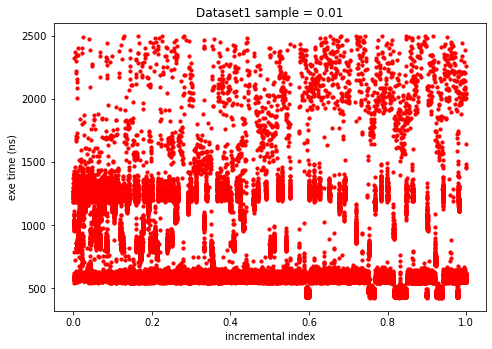

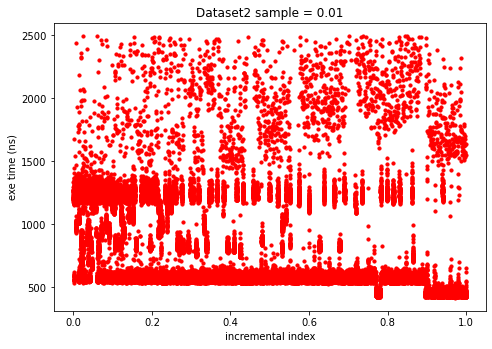

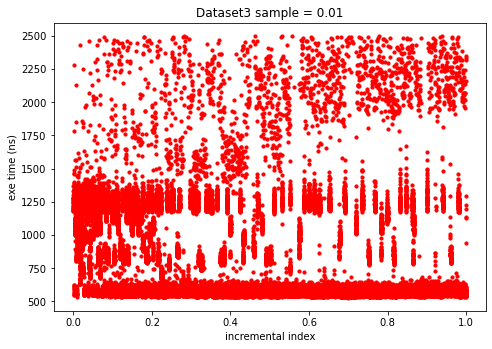

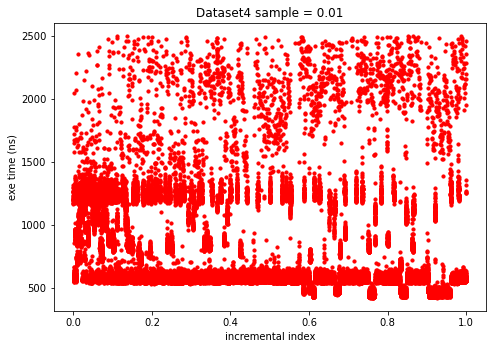

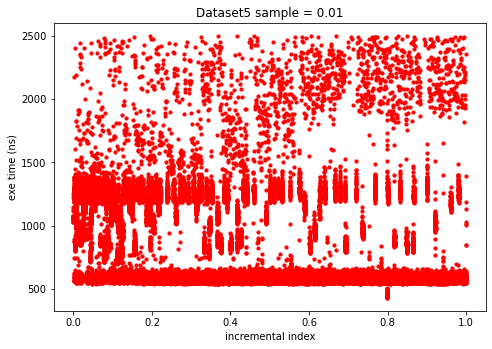

In [38]:
# visualization
ratio = 0.01
thresh_hold = 2500

sampling_list = []

for experiment_index in range(len(list_df)-1):
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    sub_df = list_df[experiment_index].iloc[::int(1//ratio), :]
#     sub_df = list_df[experiment_index].sample(frac=ratio)
    sampling_list.append(sub_df)
#         thresh_hold = 5 * sub_df['exe_time'].mean()
    Y = np.array([ i for i in sub_df['exe_time'] if i < thresh_hold])
    length = len(Y)
    X = np.array([ i/length for i in range(length)])

    ax.scatter(X, Y, color='r', s=10)
    ax.set_xlabel('incremental index')
    ax.set_ylabel('exe time (ns)')
    ax.set_title('Dataset{} sample = {}'.format(experiment_index+1, ratio))
#     ax.set_xlim(-1, 6)
    plt.show()

#     print(Y.mean(), Y.std(), Y.max(), Y. min())

In [28]:
# K Mean
K = 4
list_kmeans = []
for experiment_index in range(len(list_df)-1):
    sub_df = sampling_list[experiment_index]
    Y = np.array([ [i,0] for i in sub_df['exe_time'] if i < thresh_hold])
    kmeans = KMeans(n_clusters=K, random_state=0).fit(Y)
    list_kmeans.append(kmeans)
    print('Processing dataset {}'.format(experiment_index + 1))


Processing dataset 1
Processing dataset 2
Processing dataset 3
Processing dataset 4
Processing dataset 5


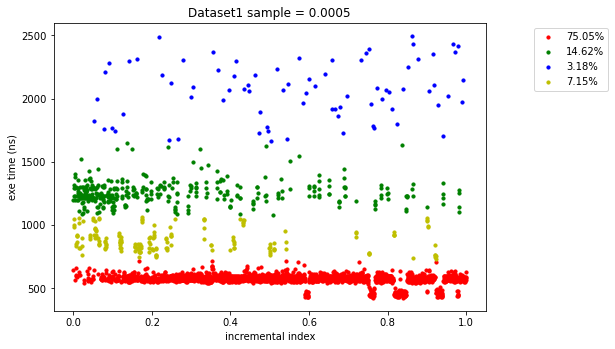

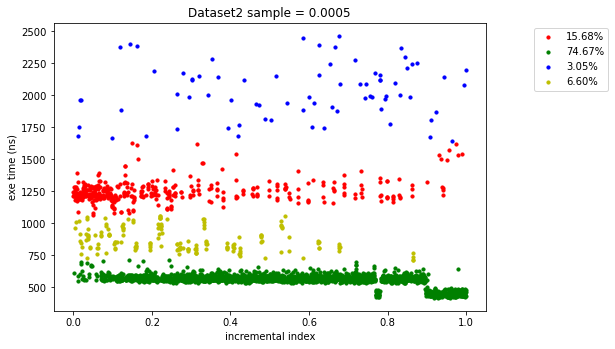

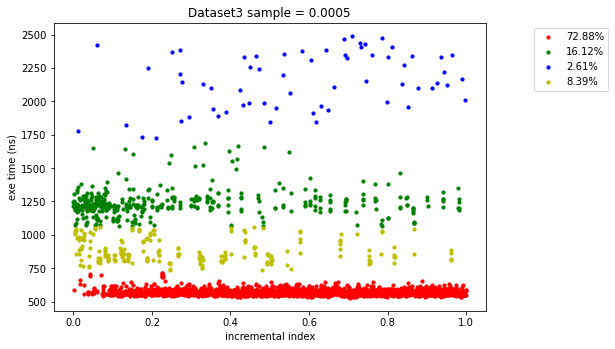

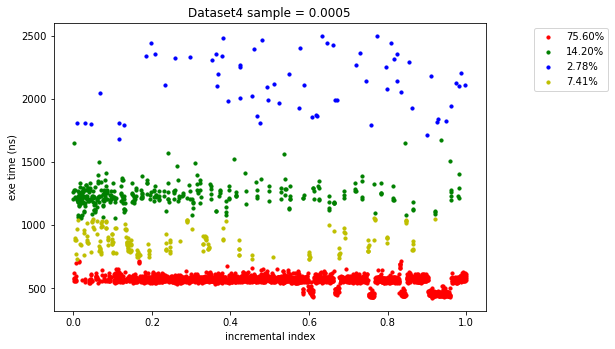

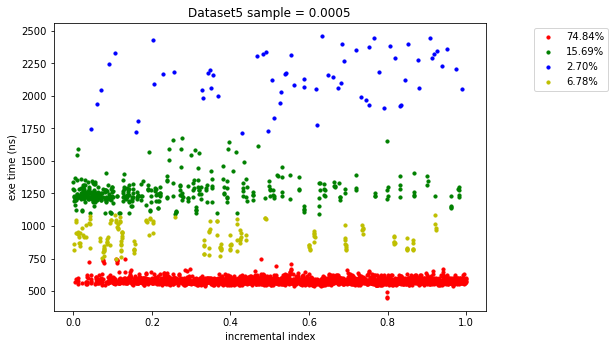

In [34]:
for experiment_index in range(len(list_df)-1):
    kmeans = list_kmeans[experiment_index]
    Y = np.array([ i for i in sampling_list[experiment_index]['exe_time'] if i < thresh_hold])
    l_x = [[] for i in range(K)]
    l_y = [[] for i in range(K)]
    l_color = ['r', 'g', 'b', 'y', 'm']
    length = len(Y)
    for index, clsuter in enumerate(kmeans.labels_):
        l_x[clsuter].append(index/length)
        l_y[clsuter].append(Y[index])


    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])

    # ax.scatter(X, Y, color='r')
    lab = [ '{:.2f}%'.format(len(l)/sum([len(l) for l in l_y])*100) for l in l_y]
    for i in range(len(l_y)):
        ax.scatter(l_x[i], l_y[i], color=l_color[i], label=lab[i], s=10)

    # ax.scatter([ 0 for item in kmeans.cluster_centers_], 
    #            [ item[0] for item in kmeans.cluster_centers_], color='g')
    ax.set_xlabel('incremental index')
    ax.set_ylabel('exe time (ns)')
    ax.set_title('Dataset{} sample = {}'.format(experiment_index+1, ratio))
    # ax.set_xlim(-1, 6)
    ax.legend(bbox_to_anchor=(1.1, 1))
    plt.show()